# Twitter Dataset Preprocessing

In [1]:
import nltk

nltk.download("twitter_samples")
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/ritesh/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


In [2]:
# Select the set of +ve and -ve tweets

all_positive_tweets = twitter_samples.strings("positive_tweets.json")

all_negative_tweets = twitter_samples.strings("negative_tweets.json")

In [3]:
all_positive_tweets

['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)',
 '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!',
 '@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!',
 '@97sides CONGRATS :)',
 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days',
 '@BhaktisBanter @PallaviRuhail This one is irresistible :)\n#FlipkartFashionFriday http://t.co/EbZ0L2VENM',
 "We don't like to keep our lovely customers waiting for long! We hope you enjoy! Happy Friday! - LWWF :) https://t.co/smyYriipxI",
 '@Impatientraider On second thought, there’s just not enough time for a DD :) But new shorts entering system. Sheep must be buying.',
 'Jgh , but we have to go to Bayan :D bye',
 'As an act of mischievousness, am calling the ETL layer of our in-house warehousing 

In [4]:
print("Number of positive tweets:",len(all_positive_tweets))
print("Number of negative tweets:",len(all_negative_tweets))


print("\nThe type of all_positive_tweets is: ",type(all_positive_tweets))
print("The type of a tweet entry is: ",type(all_negative_tweets[0]))

Number of positive tweets: 5000
Number of negative tweets: 5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


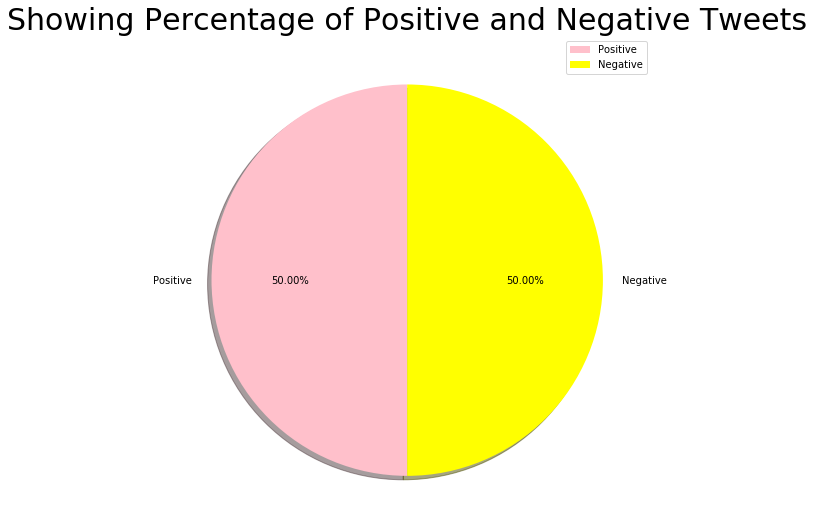

In [5]:
size = [5000,5000]
colors = ["pink","yellow"]
labels = "Positive","Negative"

my_circle = plt.Circle((0,0),0.6,color = "white")

plt.rcParams["figure.figsize"] = (9,9)
plt.pie(size,colors=colors,labels=labels,shadow=True,startangle=90,autopct="%.2f%%")
plt.title("Showing Percentage of Positive and Negative Tweets",fontsize=30)
#p=plt.gcf()
#p.gca().add_artist(my_circle)
plt.legend()
plt.show()



In [6]:
# print positive in green
print("\033[92m" +all_positive_tweets[random.randint(0,5000)])

if only you knew that the whole class was crying because of your hurtful words. :)


In [7]:
# print negative in red

print("\033[91m" + all_negative_tweets[random.randint(0,5000)])

ph vips next week na :((((


# Preprocessing raw text for Sentiment Analysis

In [8]:
tweet = all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [9]:
# downloads the stopwords from NLTK

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/ritesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
import re
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

# Remove hyperlinks, Twitter marks and styles

In [11]:
print("\033[92m" +tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [12]:
print("\033[94m")

In [13]:
# remove old style retweet text "RT"
tweet2 = re.sub(r"^RT[\s]+","",tweet) 
tweet2

'My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i'

In [14]:
# remove hyperlinks
tweet2 = re.sub(r"https?:\/\/.*[\r\n]*","",tweet2)
tweet2

'My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… '

In [15]:
# remove hastags
tweet2 = re.sub(r"#","",tweet2)
print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


# Tokenize the String

In [16]:
print()
print("\033[92m" + tweet2)
print("\033[94m")


My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 



In [17]:
#Instantiate tokenizer class

tokenizer = TweetTokenizer(preserve_case=False,strip_handles=True,reduce_len = True)

# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)
print()
print("Tokenized string:")
print(tweet_tokens)


Tokenized string:
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


# Remove stop words and punctuations

In [18]:
# import the english stop words list from NLTK
stopwords_englih = stopwords.words("english")

print("Stop words\n")
print(stopwords_englih)

print("\n Punctuation")
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [19]:
print()
print("\033[92")
print(tweet_tokens)
print("\033[94m")

tweets_clean = []
for word in tweet_tokens:
    if (word not in stopwords_englih and
       word not in string.punctuation):
        tweets_clean.append(word)
        
print("removed stop words and punctuation:")
print(tweets_clean)


[92
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

removed stop words and punctuation:
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


# Stemming 

In [20]:
print()
print("\033[92m")
print(tweets_clean)
print("\033[94m")

#Instantiate stemming class

stemmer = PorterStemmer()

#Create an empty list to score the stems

tweets_stem = []

for word in tweets_clean:
    stem_word = stemmer.stem(word)
    tweets_stem.append(stem_word)
    
print("Stemmed words")
print(tweets_stem)



['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

Stemmed words
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']
